# Se agregaron variables:

In [ ]:
def get_features(data):
    """Builds the features used for learning:
       * a trend indicator;
       * the moving average convergence divergence;
       * a volatility measure;
       * the stochastic oscillator;
       * the relative strength index;
       * the logarithm of the closing price;
       * el TRIX (Triple Exponential Average);
       * el ATR (Average True Range);
       * el OBV (On-Balance Volume);
       * el ADL (Accumulation/Distribution Line);
       * el Oscilador de Chaikin.
       Estas características pueden ser modificadas y nuevas pueden ser añadidas fácilmente.
    """

    # trend:
    trend = qnta.roc(qnta.lwma(data.sel(field="close"), 60), 1)

    # moving average convergence  divergence (MACD):
    macd = qnta.macd(data.sel(field="close"))
    macd2_line, macd2_signal, macd2_hist = qnta.macd(data, 12, 26, 9)

    # volatility:
    volatility = qnta.tr(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"))
    volatility = volatility / data.sel(field="close")
    volatility = qnta.lwma(volatility, 14)

    # the stochastic oscillator:
    k, d = qnta.stochastic(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"), 14)

    # the relative strength index:
    rsi = qnta.rsi(data.sel(field="close"))

    # the logarithm of the closing price:
    price = data.sel(field="close").ffill("time").bfill("time").fillna(0) # fill NaN
    price = np.log(price)

    # TRIX (Triple Exponential Average):
    trix_val = trix(data.sel(field="close"))

    # ATR (Average True Range):
    atr_val = atr(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"))

    # OBV (On-Balance Volume):
    obv_val = obv(data.sel(field="close"), data.sel(field="vol"))

    # ADL (Accumulation/Distribution Line):
    adl_val = adl(data.sel(field="close"))

    # Oscilador de Chaikin:
    chaikin_osc_val = chaikin_osc(adl_val, 3, 10)

    # combine the features:
    result = xr.concat(
        [trend, macd2_signal.sel(field="close"), volatility,  d, rsi, price, trix_val, atr_val, obv_val, adl_val, chaikin_osc_val],
        pd.Index(
            ["trend",  "macd", "volatility", "stochastic_d", "rsi", "price", "trix", "atr", "obv", "adl", "chaikin_osc"],
            name = "field"
        )
    )

    return result.transpose("time", "field", "asset")

    # Explicación:
    # He añadido TRIX porque es un indicador de momentum que puede ayudar a identificar cambios en la tendencia.
    # He añadido ATR porque mide la volatilidad y puede ayudar a gestionar el riesgo.
    # He añadido OBV porque mide el flujo de volumen y puede ayudar a confirmar tendencias de precios.
    # He añadido ADL de Chaikin porque mide la acumulación/distribución y puede ayudar a identificar la presión de compra/venta.
    # He añadido el Oscilador de Chaikin porque combina el ADL con medias móviles para identificar cambios en la tendencia.

# Se cambio la tecnica de machine learning:

In [ ]:
def get_model():
    """Este es un constructor para el modelo de ML (Árbol de Decisión) que puede ser fácilmente
       modificado para usar diferentes modelos.
    """
    model = DecisionTreeClassifier(random_state=42)
    return model

# Explicación:
# He elegido el Árbol de Decisión porque es un modelo no lineal que puede capturar relaciones complejas en los datos.
# Además, es fácil de interpretar y no requiere mucha preprocesamiento de datos.

# Se cambio a S&P 500 y los activos:

In [ ]:
# loading s&p 500 stock data

stock_data = qndata.stocks.load_spx_data(tail=365 * 5)

# Explicación:
# He decidido cargar todos los activos del S&P 500 para evitar problemas con activos no disponibles.

# Resultados:


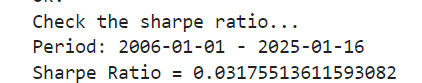



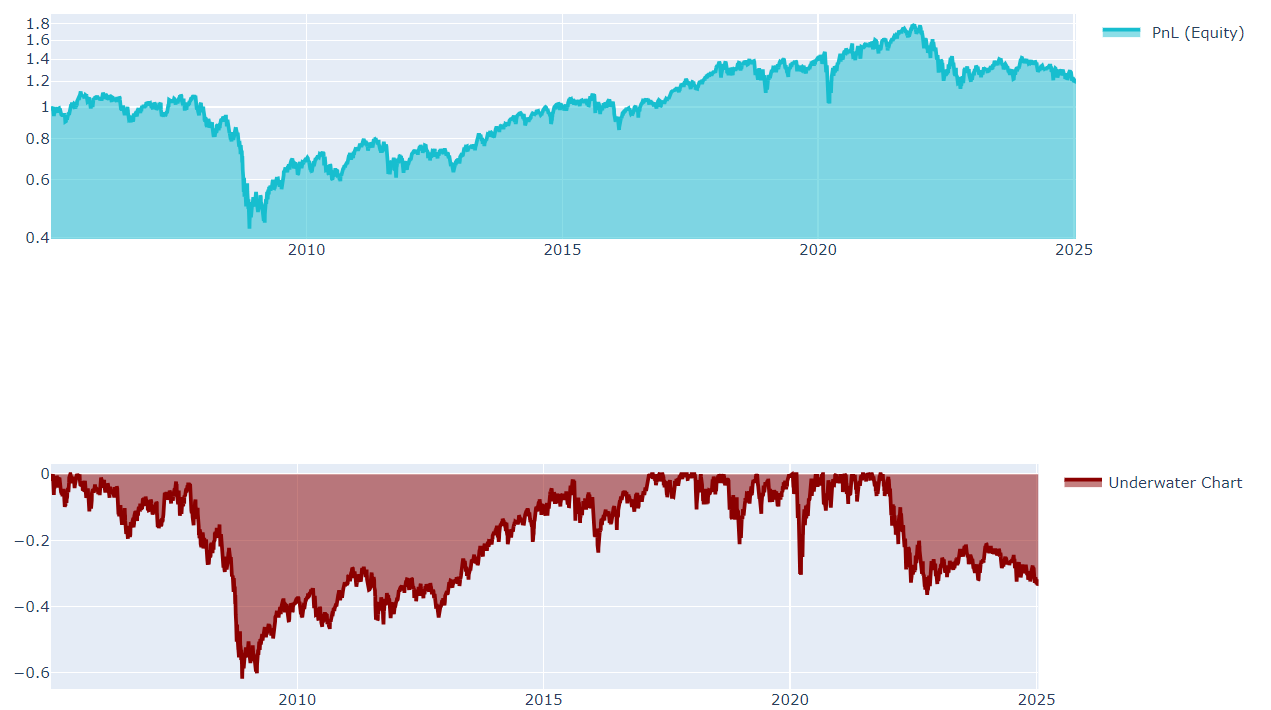